1D Burgers equation: $$\frac{\partial u}{\partial t} = -u \frac{\partial u}{\partial x}$$
Need to represent it in the conservative form to better deal with shocks: $$\frac{\partial u}{\partial t} = - \frac{\partial}{\partial x} (\frac{u^2}{2})$$
It can also be written as: $$\frac{\partial u}{\partial t} = - \frac{\partial F}{\partial x}$$
If $F = \frac{u^2}{2}$

## Initial Conditions ##

$$u(x,0) = 1, 0 \leq x < 2$$
$$u(x,0) = 0, 2 \leq x \leq 4$$

In [46]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

In [47]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [48]:
def u_initial(nx):
    
    u = numpy.zeros(nx)
    u[:(nx-1)*2./4.] = 1.
    
    return u

In [49]:
nx = 81
nt = 70
dx = 4.0/(nx-1)

In [50]:
computeF = lambda u: (u/2)**2

In [51]:
F_try = computeF(u)
print(F_try)
F_try.shape

[ 0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.  ]


(81,)

computeF replaces every value of u with $(\frac{u}{2})^2$

MacCormack Scheme

$u_i ^* = u_i ^n - \frac{\Delta t}{\Delta x} (F_{i+1} ^n - F_i ^n)$ (predictor)

$u_i ^{n+1} = \frac{1}{2} \left(u_i ^n + u_i ^* - \frac{\Delta t}{\Delta x} (F_i ^* - F_{i-1} ^*)\right)$ (corrector)

In [52]:
def maccormack(u, nt, dt, dx):
    un = numpy.zeros((nt,len(u)))
    un[:] = u.copy()
    ustar = u.copy()
    
    for t in range(1,nt):
        F = computeF(u)
        
        ustar[:-1] = u[:-1] - dt/dx*(F[1:] - F[:-1])
        
        Fstar = computeF(ustar)
        
        un[t,1:] =  .5*(u[1:] + ustar[1:] - dt/dx*(Fstar[1:] - Fstar[:-1]))
        
        u = un[t].copy()
        
    return un

MacCormack Scheme with Damping

$$u_i ^* = u_i ^n - \frac{\Delta t}{\Delta x} (F_{i+1} ^n - F_i ^n) + \epsilon (u_{i+1} ^n - 2 u_i ^n + u_{i-1} ^n)$$

In [53]:
def maccormack_damping(u, nt, dt, dx):
    eps = .5
    un = numpy.zeros((nt,len(u)))
    un[:] = u.copy()
    ustar = u.copy()
    
    for t in range(1,nt):
        F = computeF(u)
        
        ustar[1:-1] = u[1:-1] - dt/dx*(F[2:] - F[1:-1]) + eps*(u[2:] - 2*u[1:-1] + u[:-2])
        
        Fstar = computeF(ustar)
        
        un[t,1:] = .5*(u[1:] + ustar[1:] - dt/dx*(Fstar[1:] - Fstar[:-1]))
        
        u = un[t].copy()
        
    return un

In [54]:
#CFL = 1
def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

/opt/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



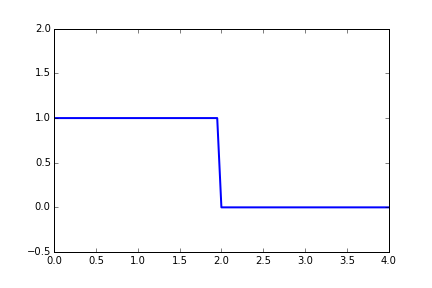
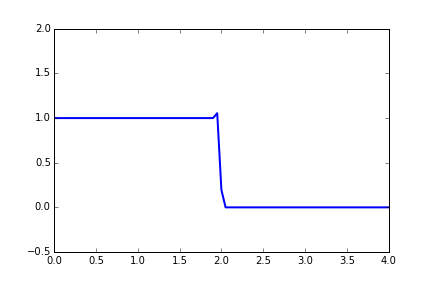
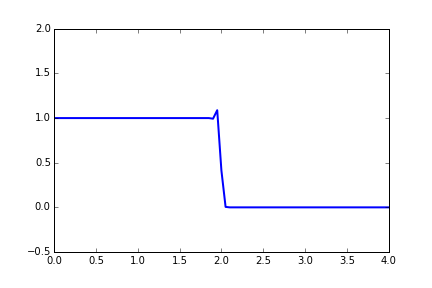
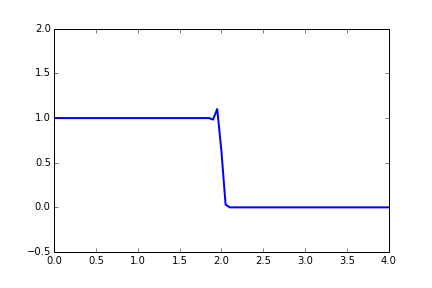
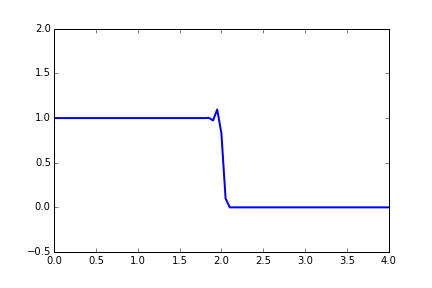
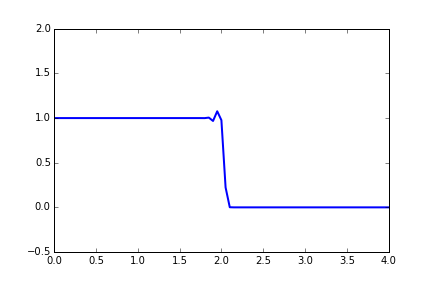
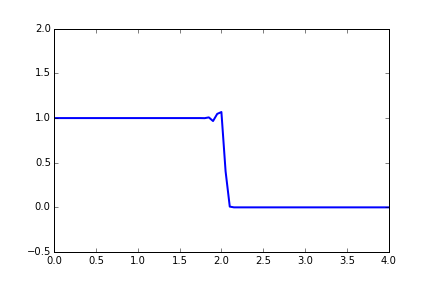
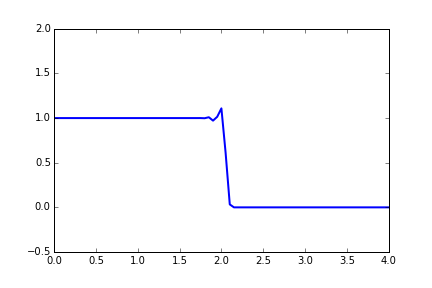
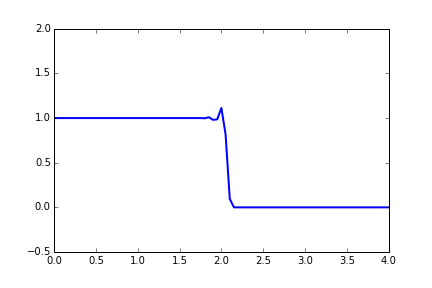
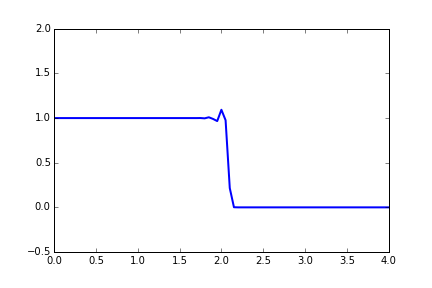
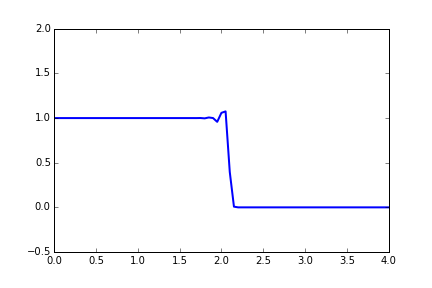
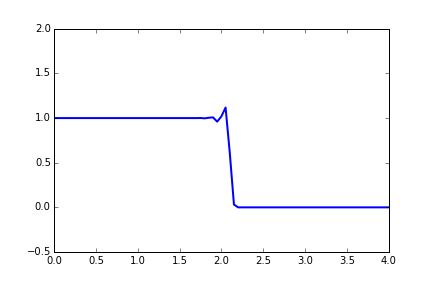
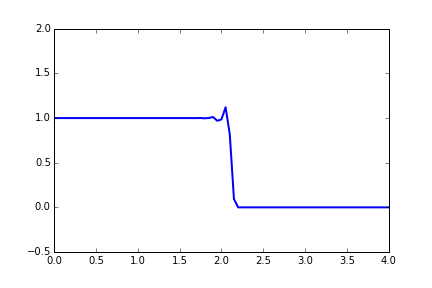
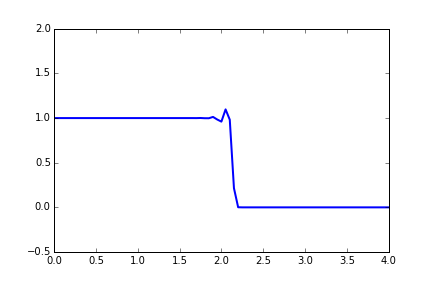
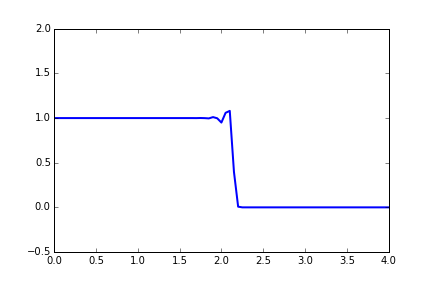
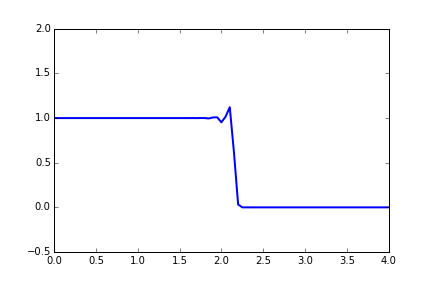
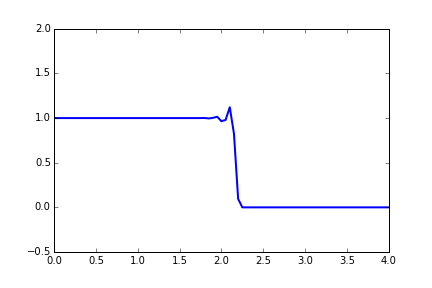
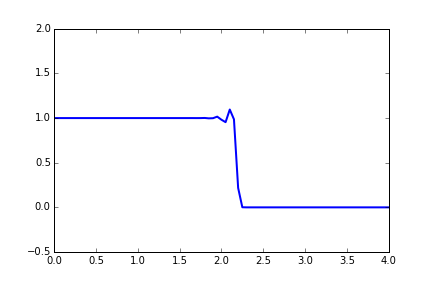
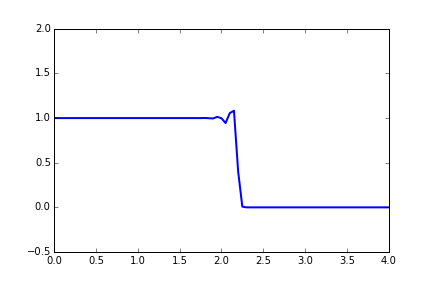
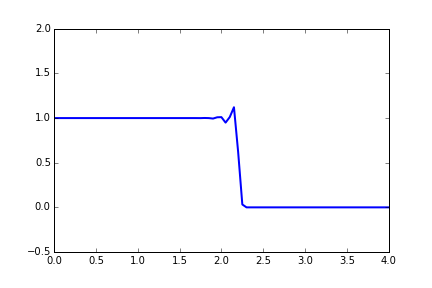
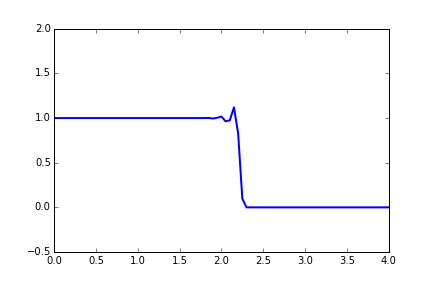
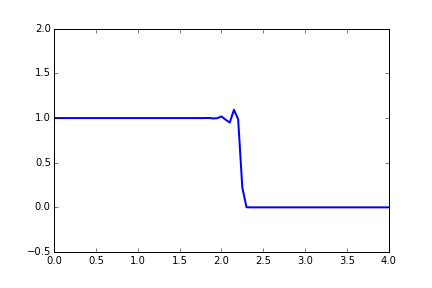
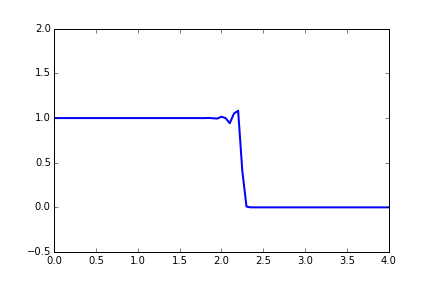
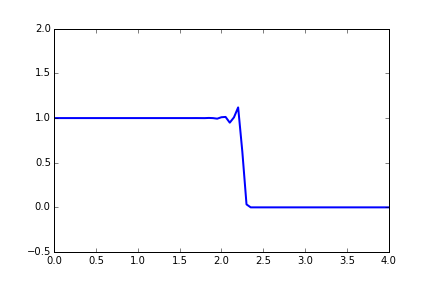
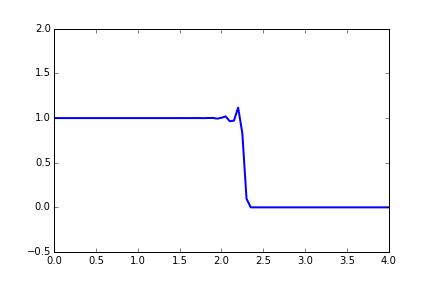
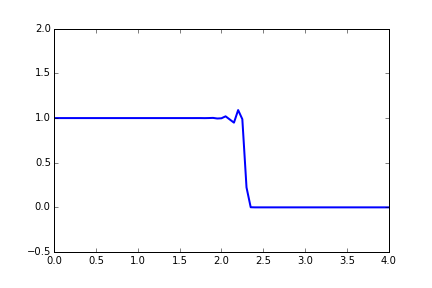
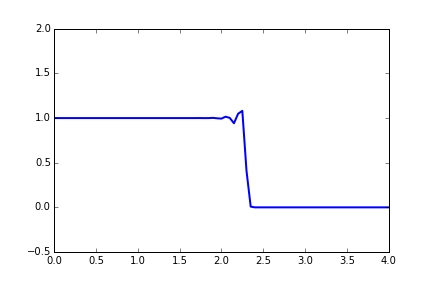
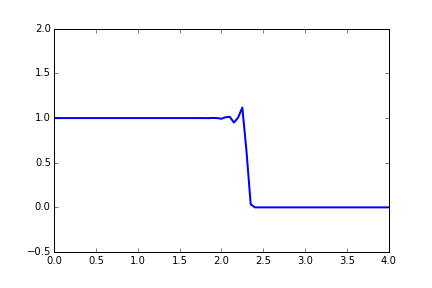
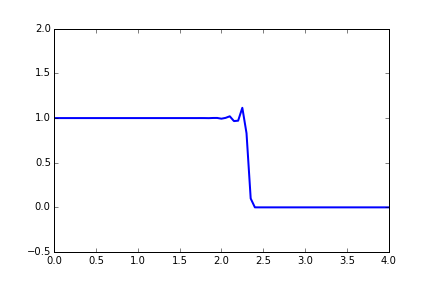
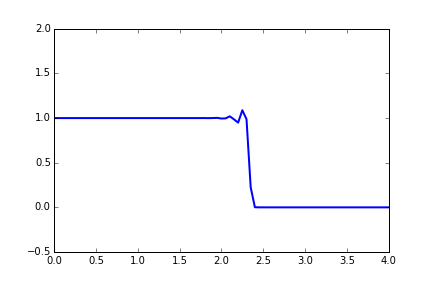
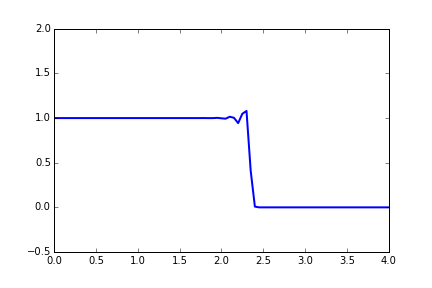
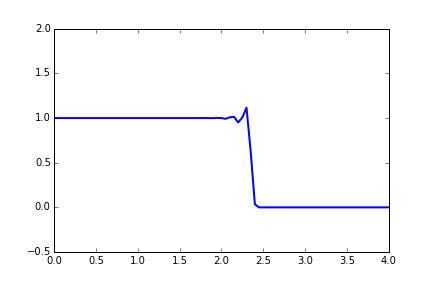
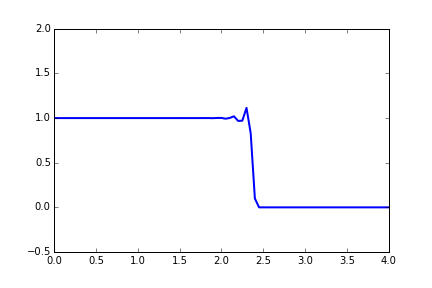
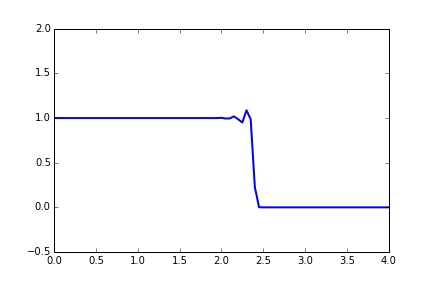
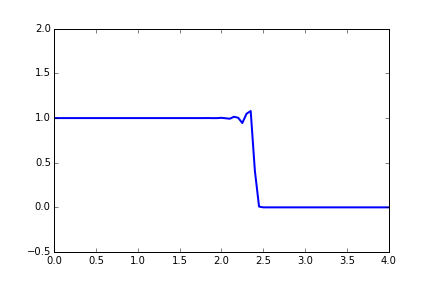
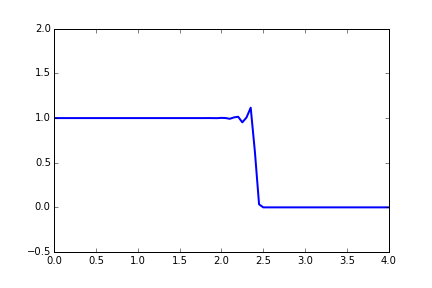
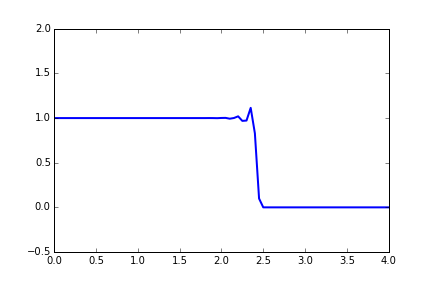
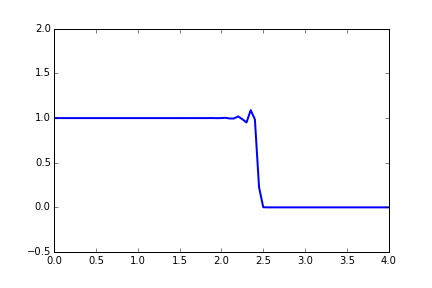
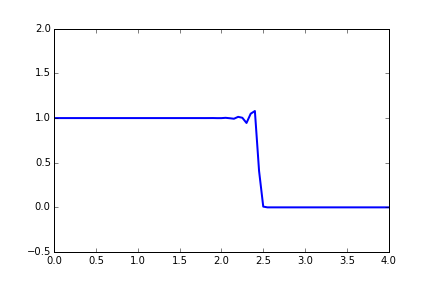
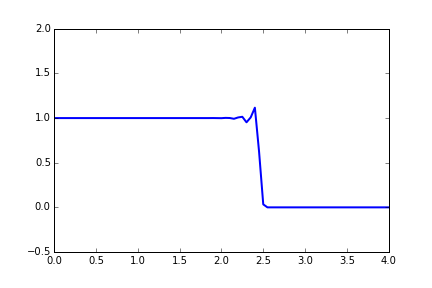
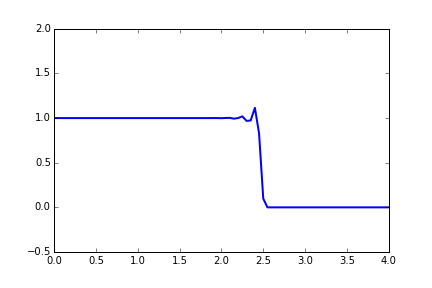
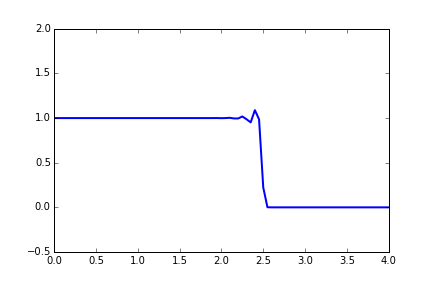
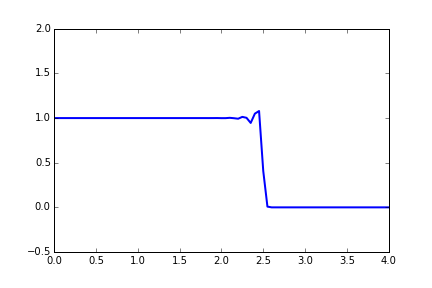
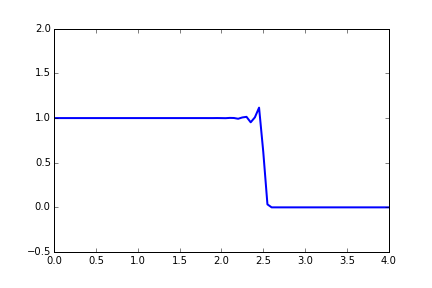
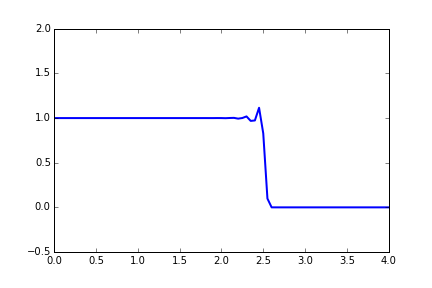
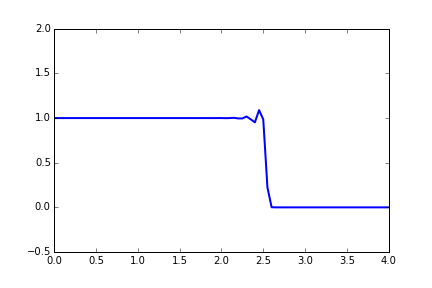
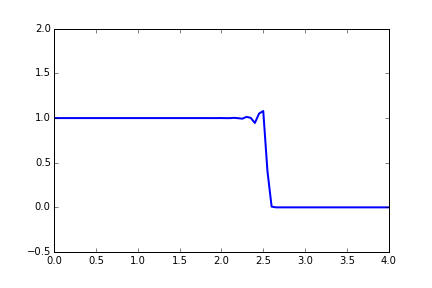
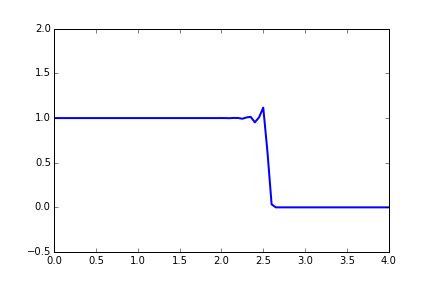
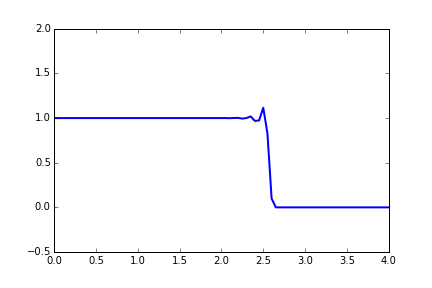
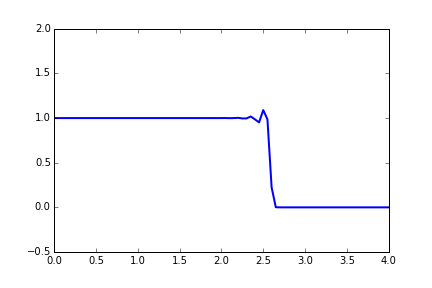
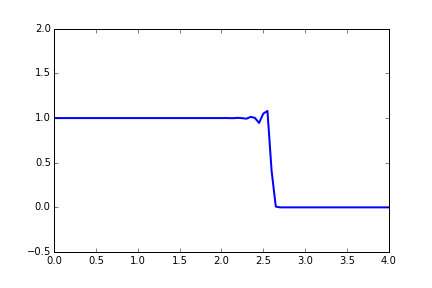
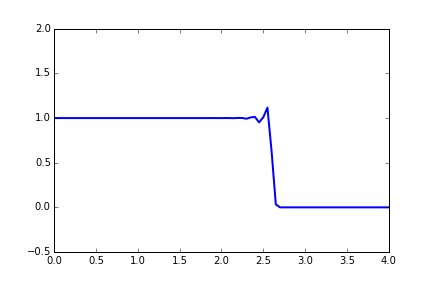
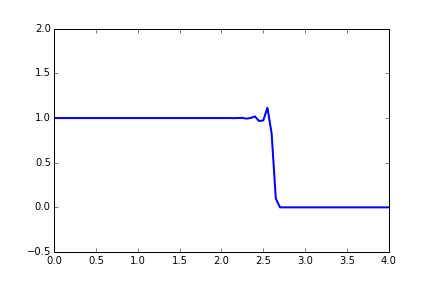
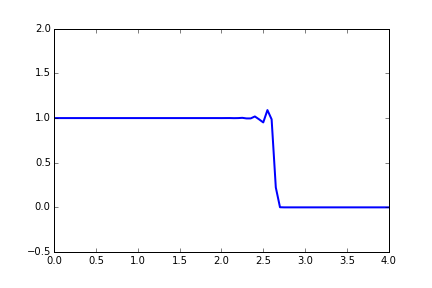
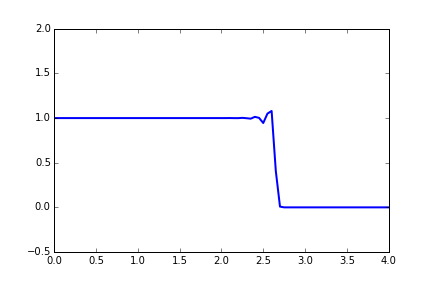
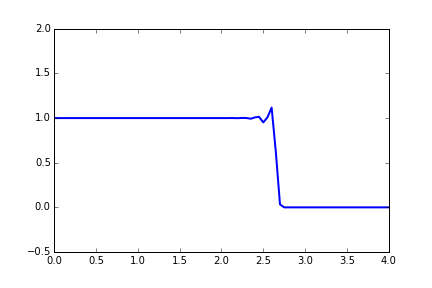
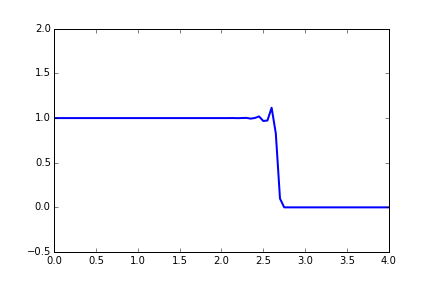
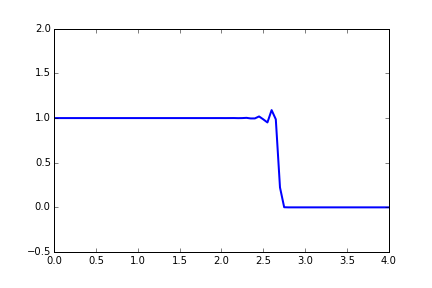
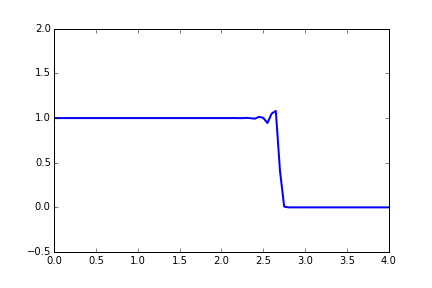
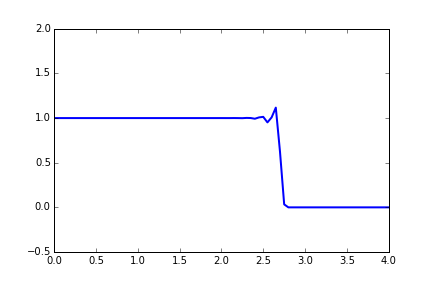
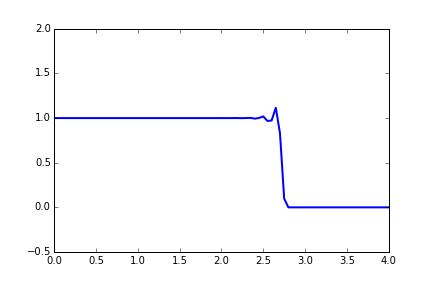
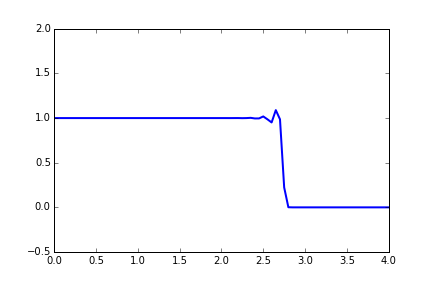
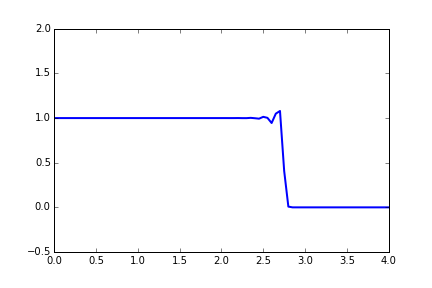
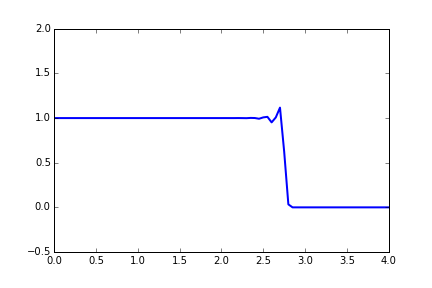
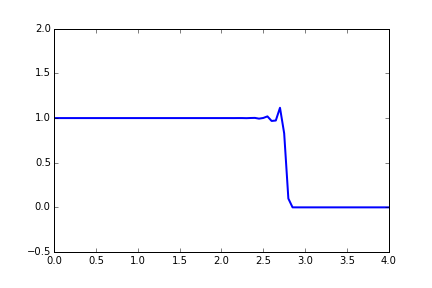
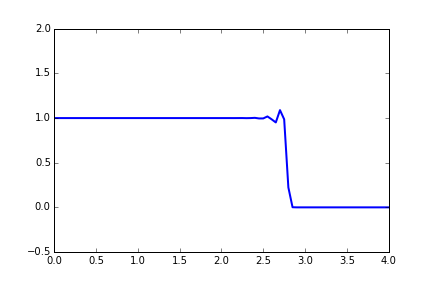
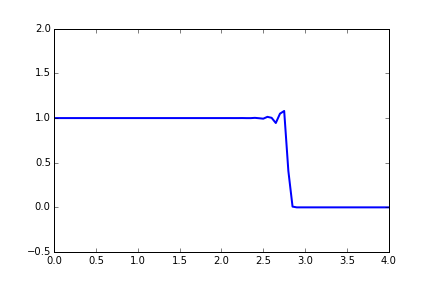
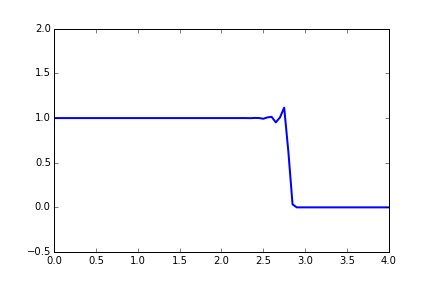
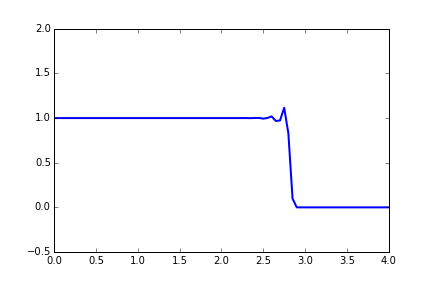
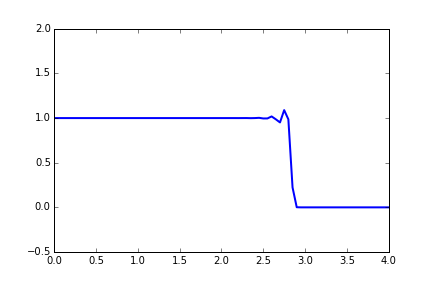

In [55]:
u = u_initial(nx)
sigma = 1
dt = sigma*dx

un = maccormack(u,nt,dt,dx)

fig = plt.figure();
ax = plt.axes(xlim=(0,4), ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un, interval=50)
display_animation(anim, default_mode='once')


/opt/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



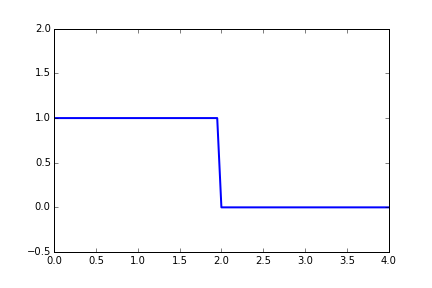
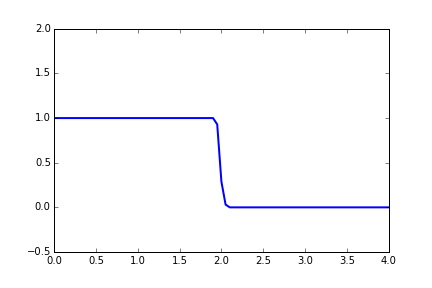
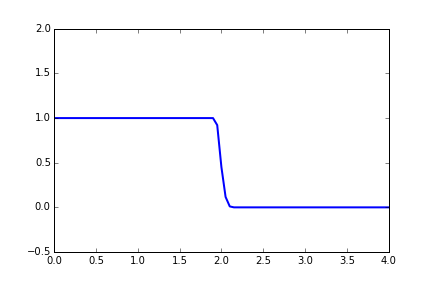
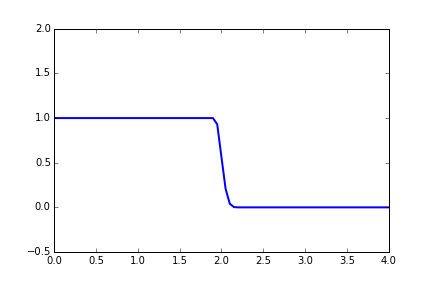
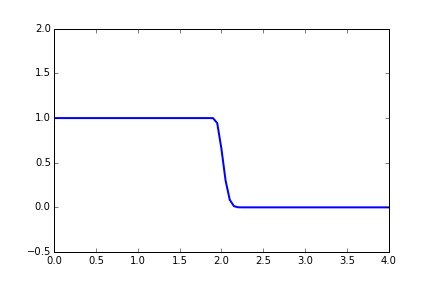
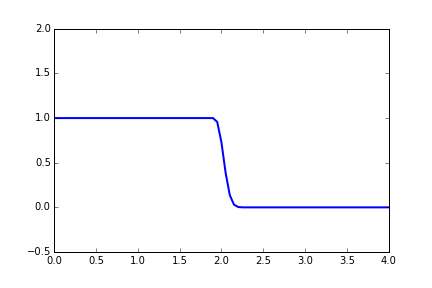
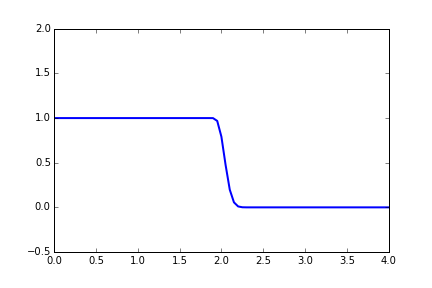
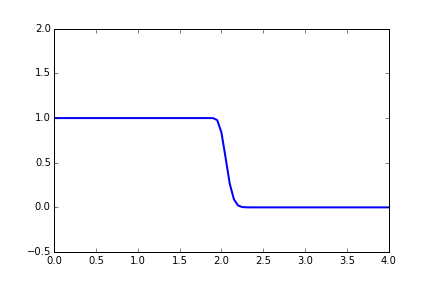
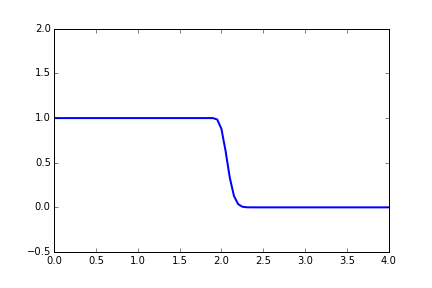
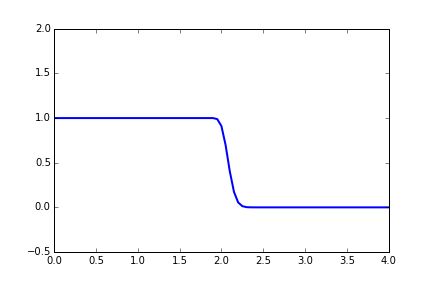
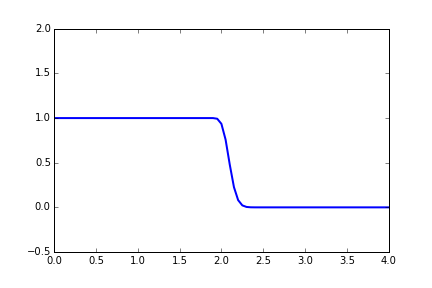
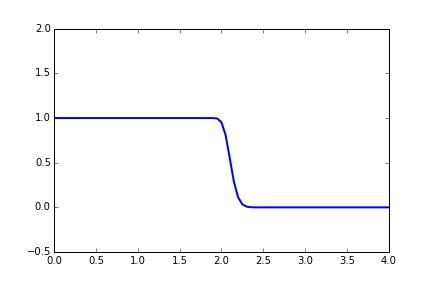
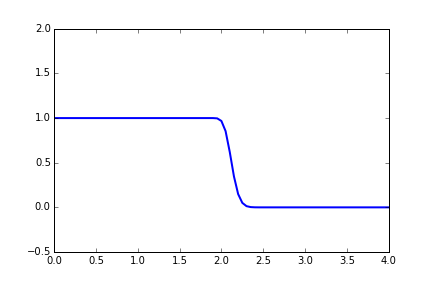
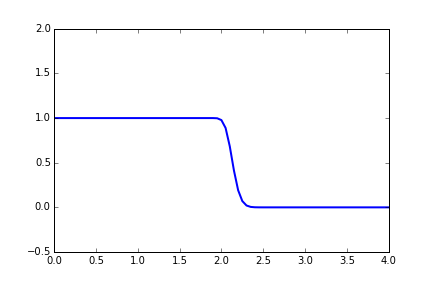
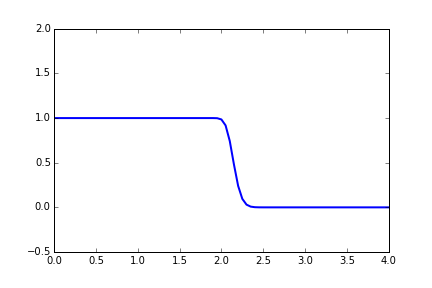
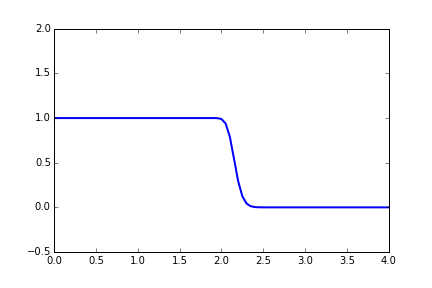
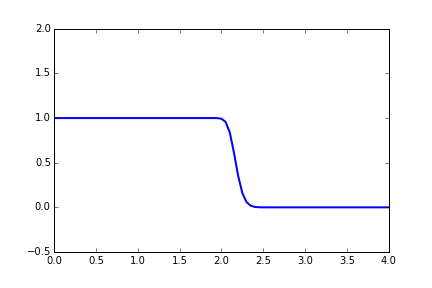
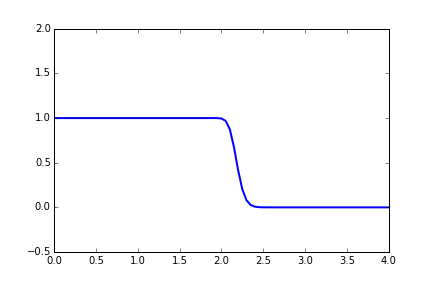
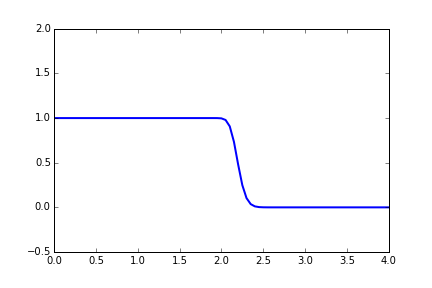
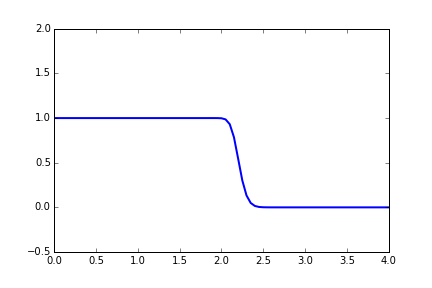
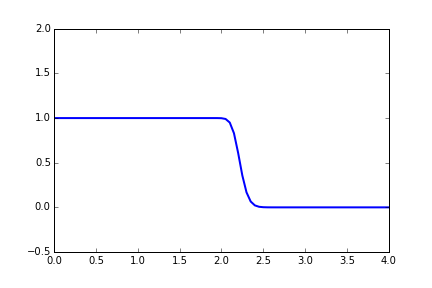
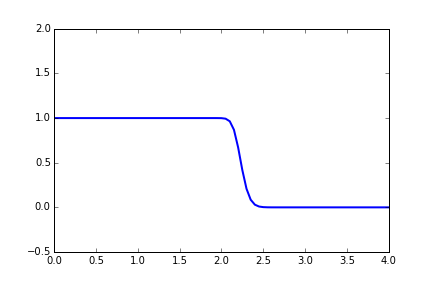
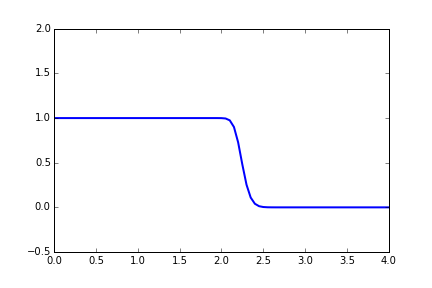
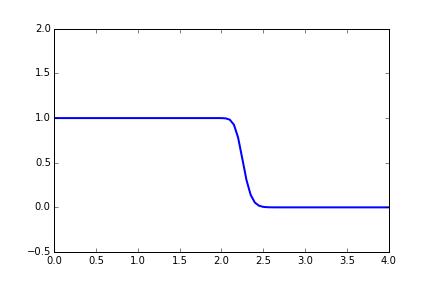
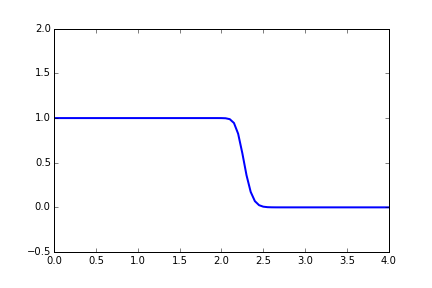
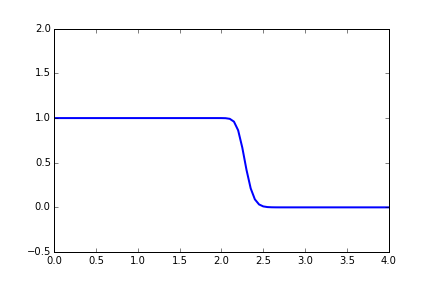
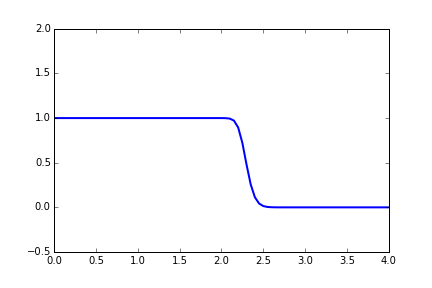
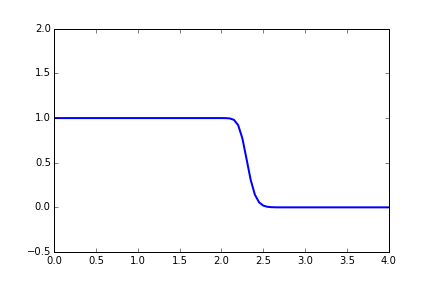
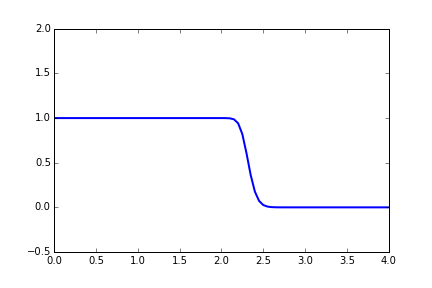
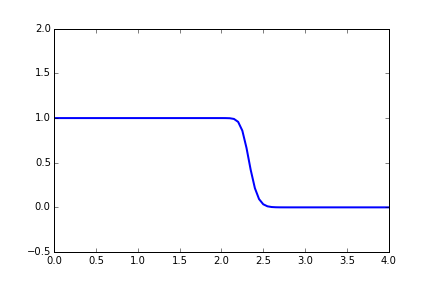
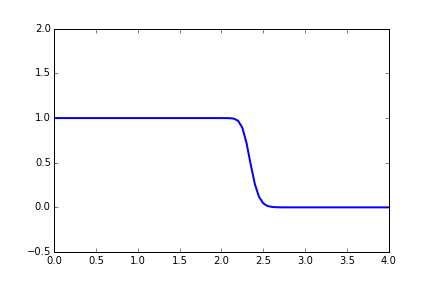
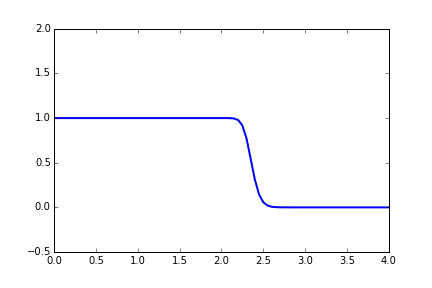
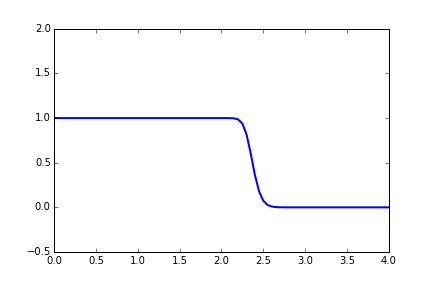
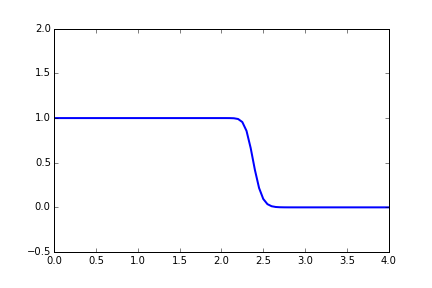
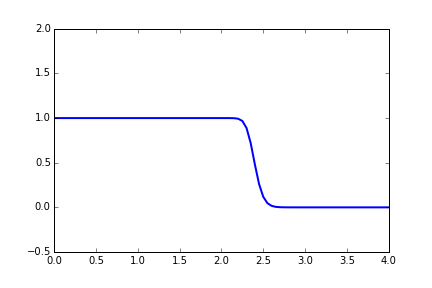
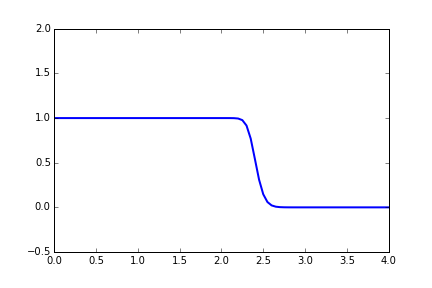
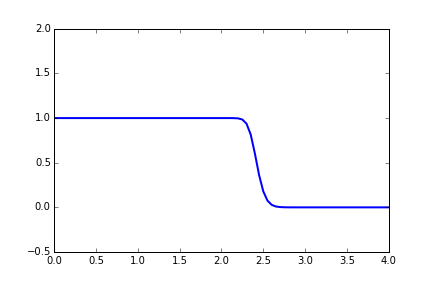
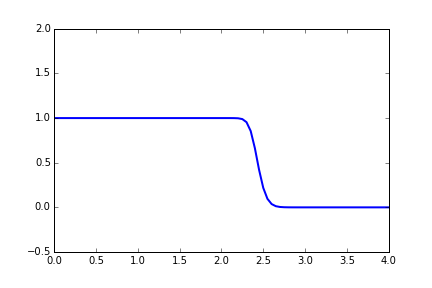
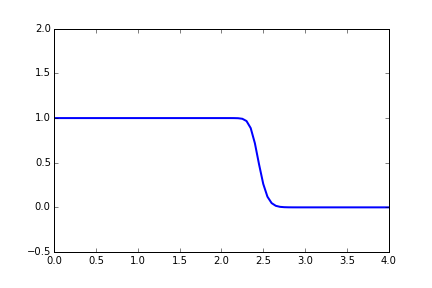
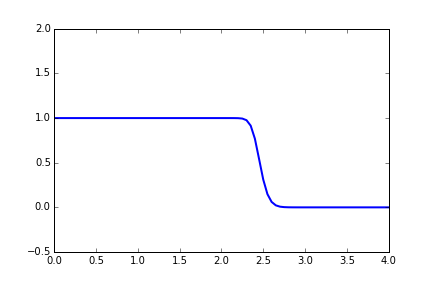
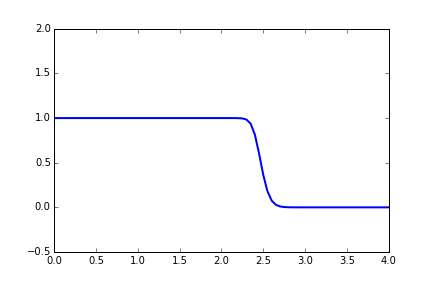
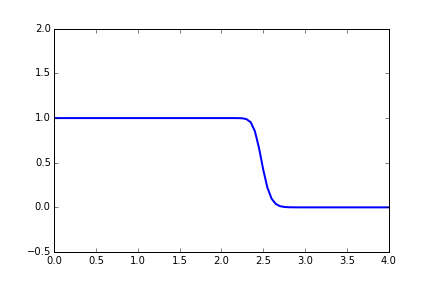
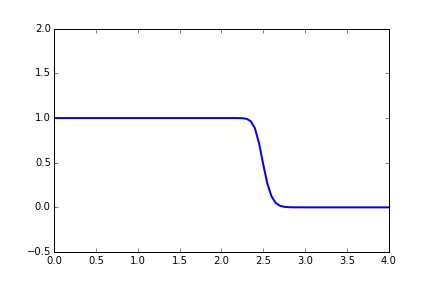
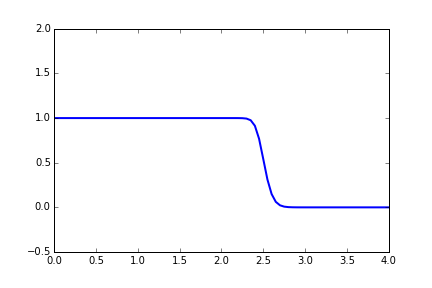
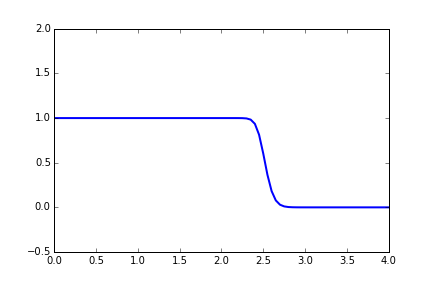
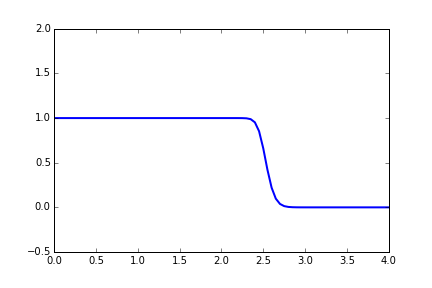
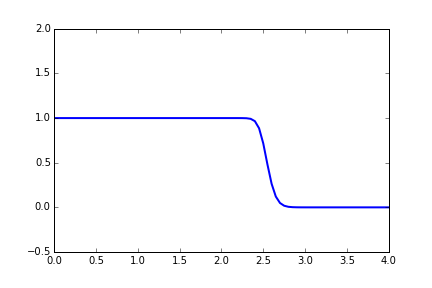
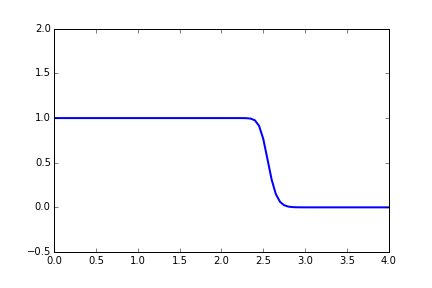
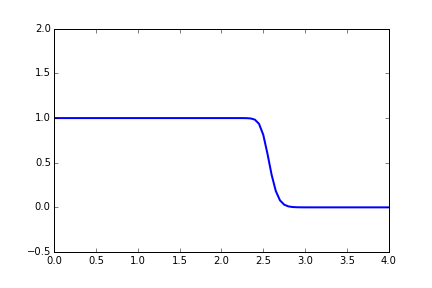
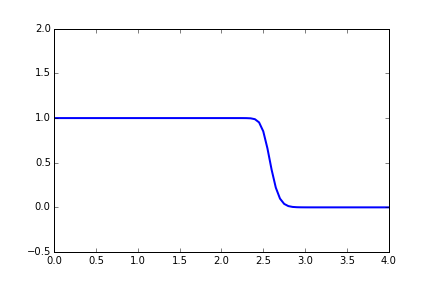
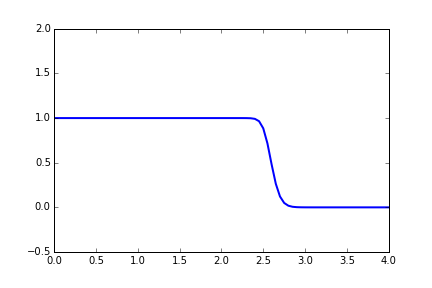
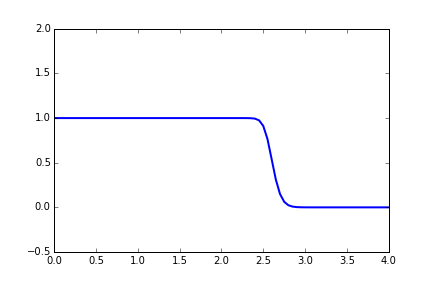
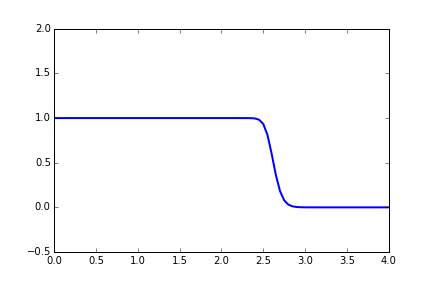
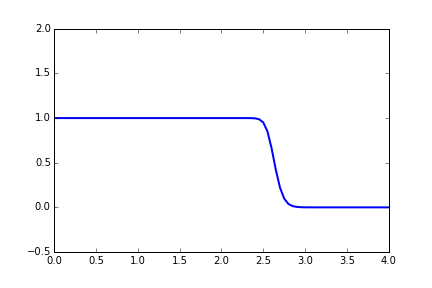
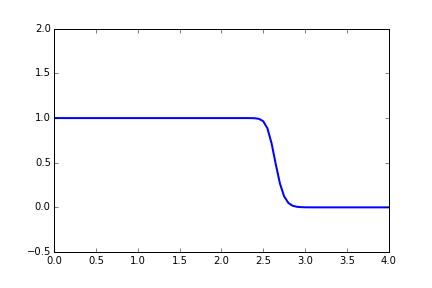
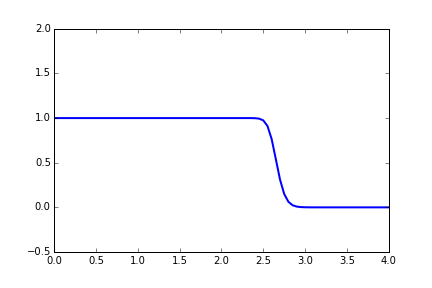
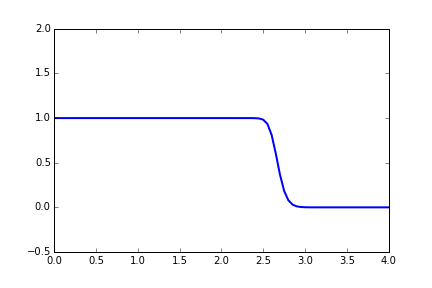
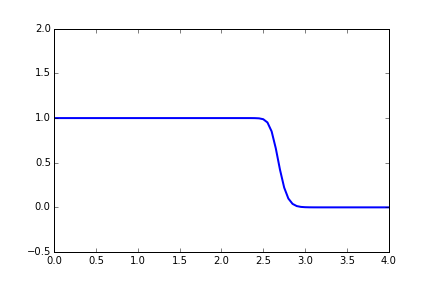
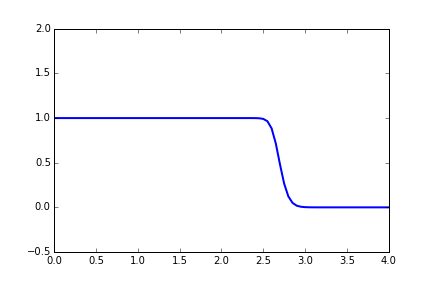
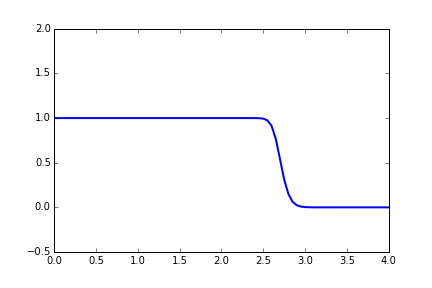
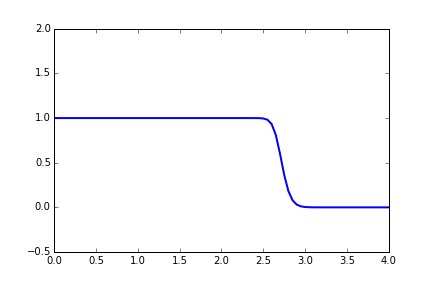
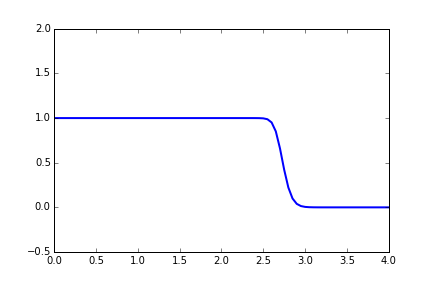
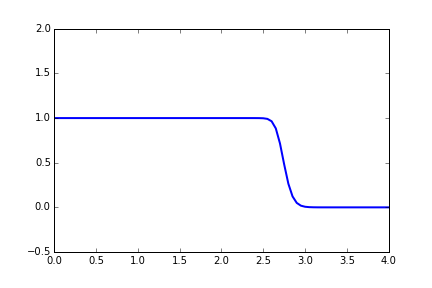
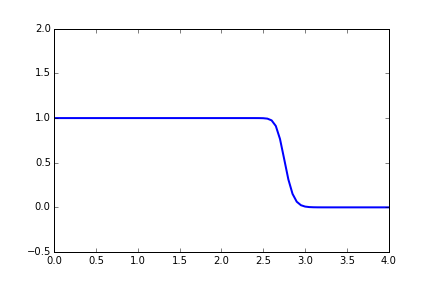
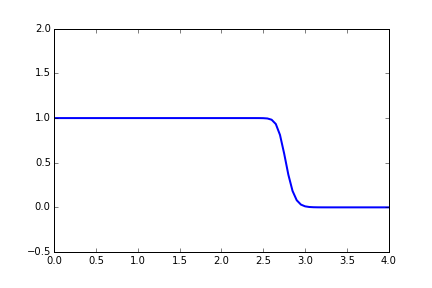
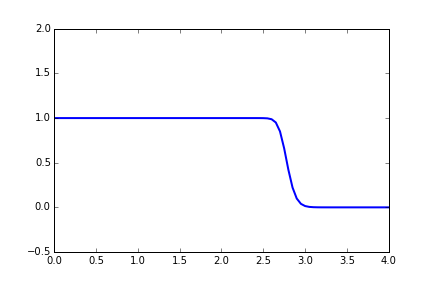
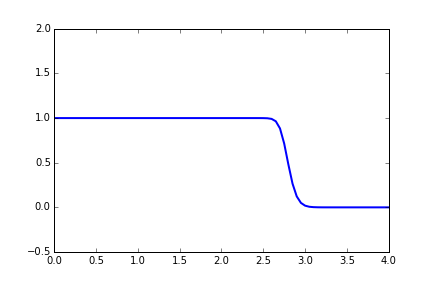
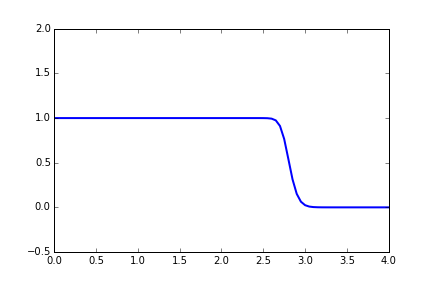
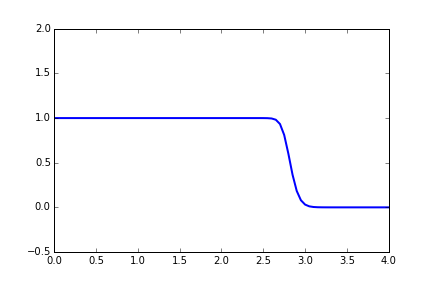
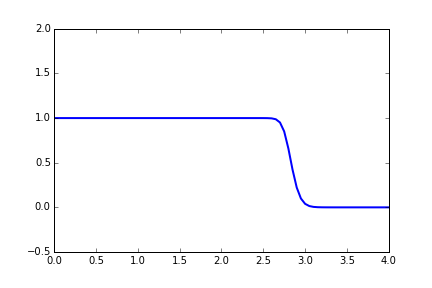

In [56]:
u = u_initial(nx)
sigma = 1
dt = sigma*dx

un = maccormack_damping(u,nt,dt,dx)

anim = animation.FuncAnimation(fig,animate, frames=un, interval=50)
display_animation(anim, default_mode='once')